In [42]:
import numpy as numpy
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [43]:
X,y= make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [44]:
X.shape


(1000, 2)

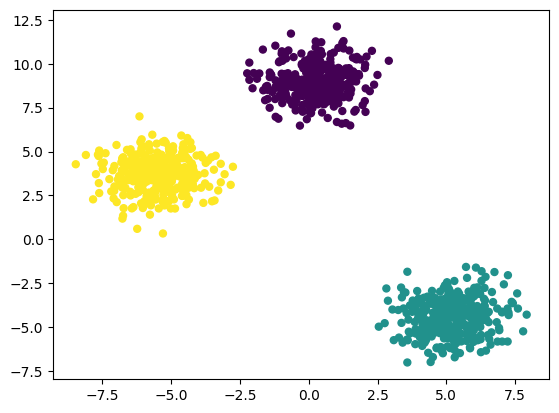

In [45]:
plt.scatter(X[:,0],X[:,1], c=y, marker='o', s=25)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.cluster import KMeans

In [48]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [49]:
wcss

[41167.283407539,
 9544.872623190913,
 1570.3723999827841,
 1410.3051701792149,
 1187.0870968518193,
 1086.9036613606388,
 923.778533631948,
 814.1066632333998,
 695.0436886371283,
 636.9865177983]

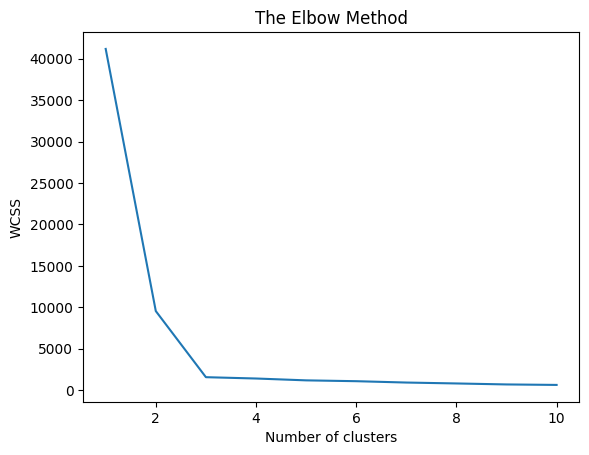

In [50]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')    
plt.ylabel('WCSS')
plt.show()

In [51]:
y_labels=kmeans.fit_predict(X_train)

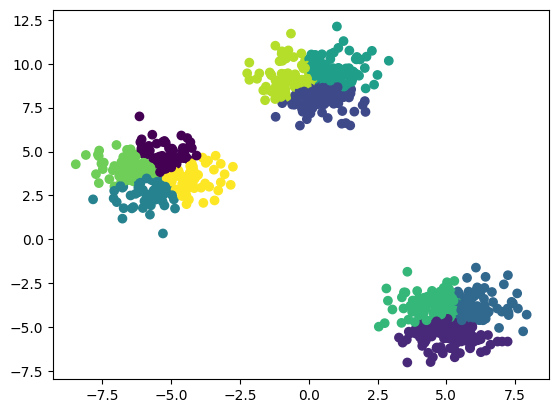

In [54]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels, )

In [55]:
pip install kneed

In [56]:
from kneed import KneeLocator
kn=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kn.elbow

3

In [ ]:
from sklearn.metrics import silhouette_score


In [61]:
from sklearn.metrics import silhouette_score

silhouette_coefficient=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_labels=kmeans.fit_predict(X_train)
    silhouette_coefficient=silhouette_score(X_train, y_labels)
    print("For n_clusters={}, silhouette_coefficient is {}".format(k, silhouette_coefficient))

For n_clusters=2, silhouette_coefficient is 0.7258310358179207
For n_clusters=3, silhouette_coefficient is 0.8068049253852778
For n_clusters=4, silhouette_coefficient is 0.6410826241329812
For n_clusters=5, silhouette_coefficient is 0.4797915669888251
For n_clusters=6, silhouette_coefficient is 0.47074006183871103
For n_clusters=7, silhouette_coefficient is 0.3238687276322649
For n_clusters=8, silhouette_coefficient is 0.327236327382735
For n_clusters=9, silhouette_coefficient is 0.3411782531545263
For n_clusters=10, silhouette_coefficient is 0.3373762666925465
